In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import json

In [120]:
path = 'Highway_25_bo_results.csv'

baseline_path = '../LA-MCTS-baselines/Bayesian-Optimization/Highway25/result200'

In [123]:
df = pd.read_csv(path, header=None, names=[i for i in range(200)])
df = df.T
df

,0
0,28.894148
1,28.894148
2,28.894148
3,28.894148
4,28.894148
...,...
195,NaN
196,NaN
197,NaN
198,NaN


In [124]:
df = df.fillna(method='ffill')

In [125]:
df = df.dropna(axis = 0, how='all')
df

,0
0,28.894148
1,28.894148
2,28.894148
3,28.894148
4,28.894148
...,...
195,29.634889
196,29.634889
197,29.634889
198,29.634889


In [126]:
means = df.mean(axis = 1)
means

0      28.894148
1      28.894148
2      28.894148
3      28.894148
4      28.894148
         ...    
195    29.634889
196    29.634889
197    29.634889
198    29.634889
199    29.634889
Length: 200, dtype: float64

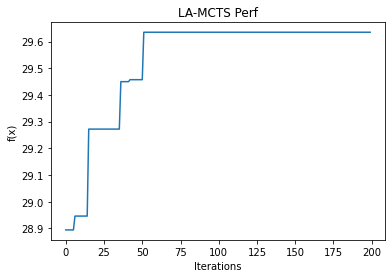

In [127]:
plt.title('LA-MCTS Perf')
plt.ylabel('f(x)')
plt.xlabel('Iterations')
plt.plot(means, label='LA-MCTS')

In [128]:
# means = means.tolist() + (200 - len(means)) * [means.tolist()[-1]]

In [129]:
means = np.array(means)

In [130]:
df_base = pd.read_csv(baseline_path, header=None, names = [i for i in range(200)])
df_base = df_base.T
df_base = df_base.fillna(method = 'ffill')
df_base

,0
0,-6.210305
1,-28.234889
2,-29.331185
3,-29.331185
4,-29.331185
...,...
195,-30.279333
196,-30.279333
197,-30.279333
198,-30.279333


In [143]:
base_mean = df_base.mean(axis = 1)

In [144]:
base_mean = base_mean[1:]
base_mean = base_mean.tolist() + [base_mean.tolist()[-1]]
base_mean = np.array(base_mean)

In [145]:
print('max, min of mcts: ', np.max(means), np.min(means))
print('max, min of bo: ', np.max(base_mean), np.min(base_mean))

max, min of mcts:  29.634888742134205 28.89414800139347
max, min of bo:  -28.23488874213421 -30.279333186578626


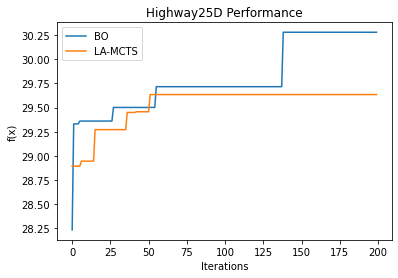

In [147]:
plt.title('Highway25D Performance')
plt.ylabel('f(x)')
plt.xlabel('Iterations')
plt.plot(base_mean*-1, label = 'BO')
plt.plot(means, label='LA-MCTS')

plt.legend()
# plt.show()
plt.savefig('graphs/highway_perf.png')